In [1]:
## import needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## load preprocessed dataset

df = pd.read_csv('Preprocessed.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [6]:
X = df.drop('subscribed', axis=1)

y = df['subscribed']

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
PrincipalComponents = pca.fit_transform(X)
pca_df = pd.DataFrame(data = PrincipalComponents, columns = ['pc1', 'pc2'])

In [12]:
pca_df.head()

,pc1,pc2
0,-1.634284,1.154582
1,-1.892086,1.250669
2,-1.438187,0.660978
3,-1.606774,0.753521
4,-1.546778,1.201585


In [15]:
final_df = pd.concat([pca_df, y], axis = 1)

In [16]:
final_df.head()

,pc1,pc2,subscribed
0,-1.634284,1.154582,0
1,-1.892086,1.250669,0
2,-1.438187,0.660978,0
3,-1.606774,0.753521,0
4,-1.546778,1.201585,0


In [19]:
# sns.scatterplot(data=final_df, x="pc1", y="pc2", hue="subscribed")

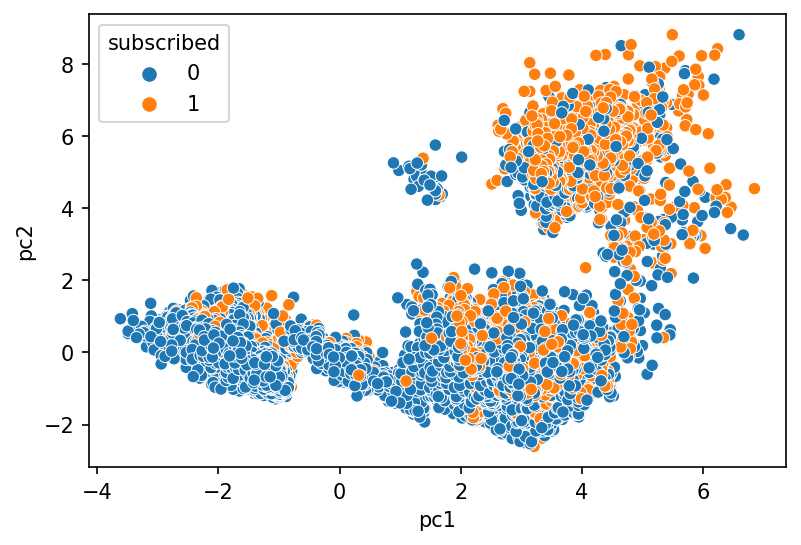

In [18]:
plt.figure(dpi=150)
ax = sns.scatterplot(data=final_df, x="pc1", y="pc2", hue="subscribed")
plt.show()

In [21]:
## Save as CSV File

final_df.to_csv('PCA_Bank_marketing.csv', header=True, index=False)